This script quantifies non-additive effects as in PMID 25897392.

In [1]:
import pandas, numpy, matplotlib_venn

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'sans-serif', 'xtick.labelsize':30, 'ytick.labelsize':30, 'figure.figsize':(16, 9), 'axes.labelsize':40, 'svg.fonttype':'none'})

# 0. user-defined variables

In [3]:
expression_file = '/home/adrian/projects/nautholsvik/results/tpm/DESeq2_TPM_values.tsv'
significance_dir = '/home/adrian/projects/nautholsvik/results/DEGs_DESeq2/'
annotation_file = '/home/adrian/projects/nautholsvik/results/annotation/annotation.csv'

expression_figures_dir = '/home/adrian/projects/nautholsvik/results/non-additive/'

In [4]:
genotypes = ['siCTRL', 'siMITF']
treatments = ['wo_IFN', 'with_IFN']

# 1. read annotation

In [5]:
raw = {}
with open(annotation_file, 'r') as f:
    header = f.readline()
    for line in f:
        v = line.split(',')
        v = [element.replace('"', '') for element in v]
        v[-1] = v[-1].replace('\n', '')
        
        gene_name = ''
        ensembl = v[2]
        gene_name = v[3]
        description = v[4].split('[Source')[0]
        if gene_name == '':
            gene_name = ensembl
            
        raw[ensembl] = [gene_name, description]
        
# create a dataframe
df = pandas.DataFrame.from_dict(raw)
annotation = df.transpose()
annotation.columns = ['gene_name', 'description']
print(annotation.shape)

(68324, 2)


# 2. read and manipulate expression data

In [6]:
expression_with_replicates = pandas.read_csv(expression_file, sep='\t', index_col=0)

In [7]:
plotting_df = pandas.DataFrame()
replicate_labels = expression_with_replicates.columns

for genotype in genotypes:
    for treatment in treatments:
        new_label = genotype + '_' + treatment + '_tpm'
        sub = [label for label in replicate_labels if genotype in label and treatment in label]
        df = expression_with_replicates[sub]
        plotting_df[new_label] = df.median(axis=1)

In [8]:
plotting_df['average_expression_tpm'] = plotting_df.mean(axis=1)
plotting_df['max_expression_tpm'] = plotting_df.max(axis=1)

plotting_df['geneID'] = annotation['gene_name']
plotting_df['description'] = annotation['description']

print(plotting_df.shape)
plotting_df.head()

(40173, 8)


,siCTRL_wo_IFN_tpm,siCTRL_with_IFN_tpm,siMITF_wo_IFN_tpm,siMITF_with_IFN_tpm,average_expression_tpm,max_expression_tpm,geneID,description
ENSG00000000003,24.864996,22.810767,23.996147,23.638828,23.827684,24.864996,TSPAN6,tetraspanin 6
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,TNMD,tenomodulin
ENSG00000000419,148.830008,143.782572,159.665244,156.673309,152.237783,159.665244,DPM1,dolichyl-phosphate mannosyltransferase subunit 1
ENSG00000000457,6.434201,9.625513,9.285772,11.832608,9.294523,11.832608,SCYL3,SCY1 like pseudokinase 3
ENSG00000000460,42.553495,32.939327,33.307114,22.274693,32.768657,42.553495,C1orf112,chromosome 1 open reading frame 112


# 3. add fold-changes of each independent effect

In [9]:
plotting_df['A1A0_log2fc'] = numpy.log2(plotting_df['siCTRL_with_IFN_tpm']+1) - numpy.log2(plotting_df['siCTRL_wo_IFN_tpm']+1)
plotting_df['B0A0_log2fc'] = numpy.log2(plotting_df['siMITF_wo_IFN_tpm']+1) - numpy.log2(plotting_df['siCTRL_wo_IFN_tpm']+1)
plotting_df['B1A0_log2fc'] = numpy.log2(plotting_df['siMITF_with_IFN_tpm']+1) - numpy.log2(plotting_df['siCTRL_wo_IFN_tpm']+1)

plotting_df.head()

,siCTRL_wo_IFN_tpm,siCTRL_with_IFN_tpm,siMITF_wo_IFN_tpm,siMITF_with_IFN_tpm,average_expression_tpm,max_expression_tpm,geneID,description,A1A0_log2fc,B0A0_log2fc,B1A0_log2fc
ENSG00000000003,24.864996,22.810767,23.996147,23.638828,23.827684,24.864996,TSPAN6,tetraspanin 6,-0.119387,-0.049295,-0.070067
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,TNMD,tenomodulin,0.000000,0.000000,0.000000
ENSG00000000419,148.830008,143.782572,159.665244,156.673309,152.237783,159.665244,DPM1,dolichyl-phosphate mannosyltransferase subunit 1,-0.049439,0.100731,0.073612
ENSG00000000457,6.434201,9.625513,9.285772,11.832608,9.294523,11.832608,SCYL3,SCY1 like pseudokinase 3,0.515283,0.468401,0.787565
ENSG00000000460,42.553495,32.939327,33.307114,22.274693,32.768657,42.553495,C1orf112,chromosome 1 open reading frame 112,-0.359831,-0.344281,-0.904026


# 4. read fold changes and P values from DESeq2

In [10]:
# read signifcances
df = pandas.read_csv(significance_dir+'A0_B0_transition.tsv', sep='\t', index_col=0)
print(df.shape)
plotting_df['P_B0A0'] = df['padj']
plotting_df['log2FoldChange'] = df['log2FoldChange']
print(plotting_df.shape)

(9260, 6)
(40173, 13)


In [11]:
# check the merging
plotting_df = plotting_df[plotting_df['P_B0A0'].notna() == True]
plotting_df.shape

(9220, 13)

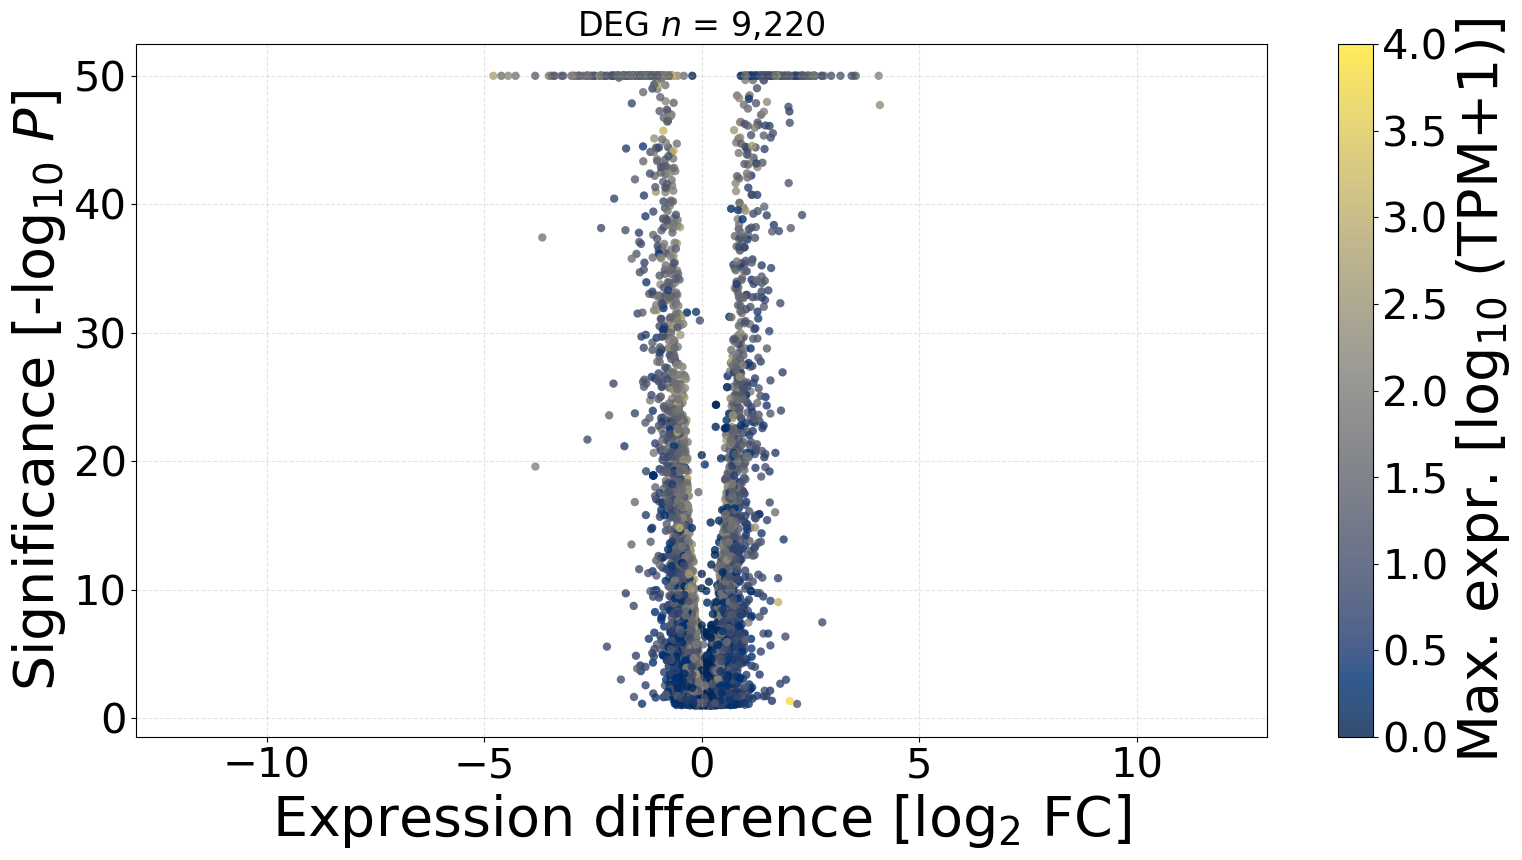

In [13]:
# doing a volcano plot for fun
x = plotting_df['log2FoldChange']
x = plotting_df['B0A0_log2fc']
y = -numpy.log10(plotting_df['P_B0A0']) 
y.clip(upper=50, inplace=True)
z = numpy.log10(plotting_df['max_expression_tpm']+1)

matplotlib.pyplot.scatter(x, y, c=z, alpha=0.8, edgecolors='none', cmap='cividis', vmin=0, vmax=4)
matplotlib.pyplot.colorbar(label='Max. expr. [log$_{10}$ (TPM+1)]')

matplotlib.pyplot.xlim([-13, 13])
matplotlib.pyplot.grid(ls='--', alpha = 1/3)
matplotlib.pyplot.xlabel('Expression difference [log$_2$ FC]')
matplotlib.pyplot.ylabel('Significance [-log$_{10}$ $P$]')
matplotlib.pyplot.title('DEG $n$ = 9,220')

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()